In [59]:
%run Function_set_dic.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [60]:
network,pos = Make_Question(3,3,Density = 0.85, option = "1-norm", distance = 2)

print(network)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0.]]


{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (1, 2): '7', (1, 3): '8', (2, 4): '10', (3, 4): '12', (4, 5): '15', (4, 6): '16', (5, 7): '18', (6, 7): '20', (2, 1): '9', (3, 1): '11', (4, 2): '13', (4, 3): '14', (5, 4): '17', (6, 4): '19', (7, 5): '21', (7, 6): '22'}


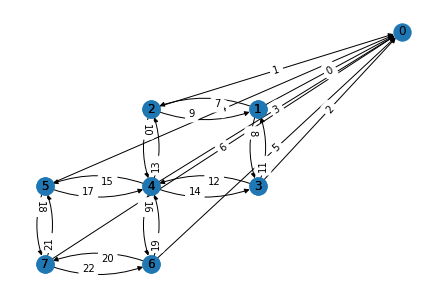

In [61]:
G, compelete_label, graph = complete_Graph(network,pos)
print(compelete_label)

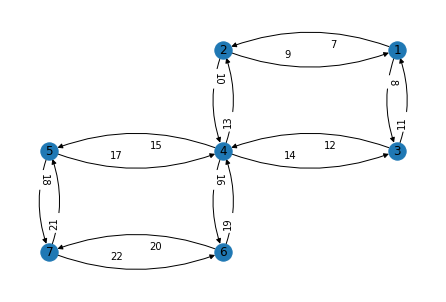

In [62]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

In [63]:
%run Function_set_dic.ipynb
Final_map, lowest_edge_number = edge_map(G, compelete_label, sub_edge_label)


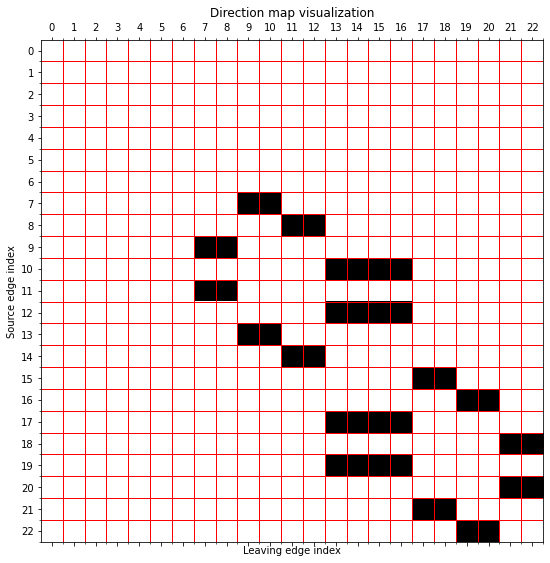

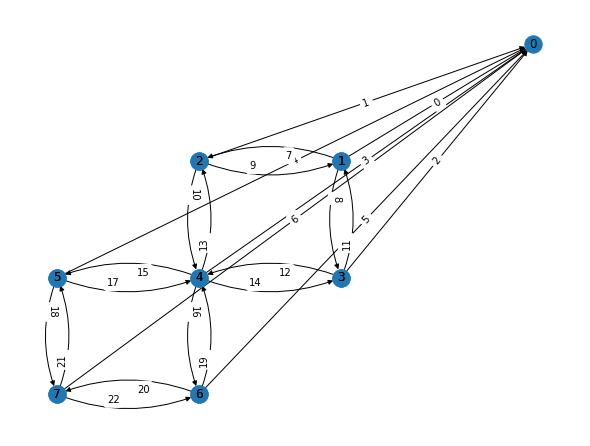

In [64]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(Final_map,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticks(np.arange(0, Final_map.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticklabels(np.arange(0, Final_map.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [65]:
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1

# How many edges
edge_number = len(compelete_label)

# make dictionary
edge_dictionary,Total = make_dictionary(edge_number, Q)

# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
basic_cost = np.ones(edge_number)

# flow cost (p)
flow_cost = np.ones(edge_number)

# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((edge_number*Q,edge_number*Q))

In [66]:
edge_dictionary["x_%d_%d"%(0,0)]

0

In [67]:
%run Function_set_dic.ipynb

QUBO_Obj = Objective(Q, edge_number, edge_dictionary, QUBO_matrix_initial, basic_cost,flow_cost)

In [68]:
#a = np.array([1,3,5])
#b = np.array([2,4,6,8,10,12])
#x,y = np.meshgrid(a,b)
#print(x,y)
#np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
penal = 50

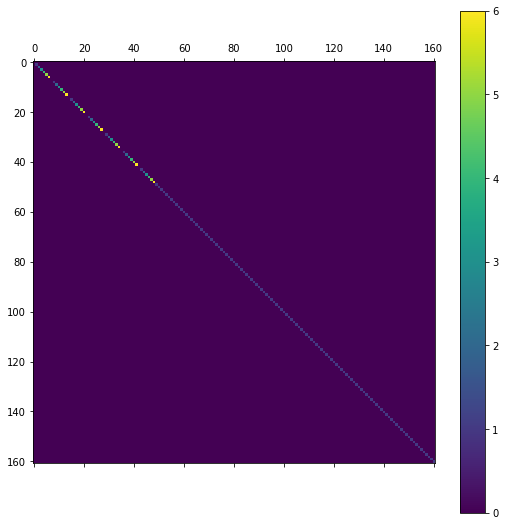

In [69]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Obj,fignum=matfig.number)
plt.colorbar()
plt.show()

In [70]:
%run Function_set_dic.ipynb
QUBO_Constraint_1 = Constraint_1(Final_map, Q, edge_number, edge_dictionary, QUBO_matrix_initial, penalty = penal)

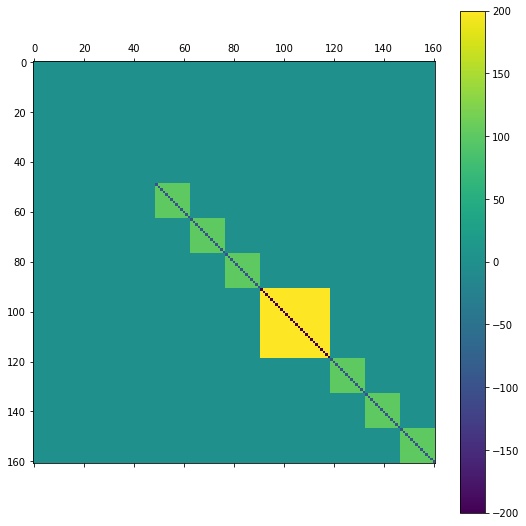

In [71]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_1,fignum=matfig.number)
plt.colorbar()
plt.show()

In [72]:
%run Function_set_dic.ipynb
QUBO_Constraint_2 = Constraint_2(Final_map, Q, edge_number, edge_dictionary, QUBO_matrix_initial, penalty = penal)

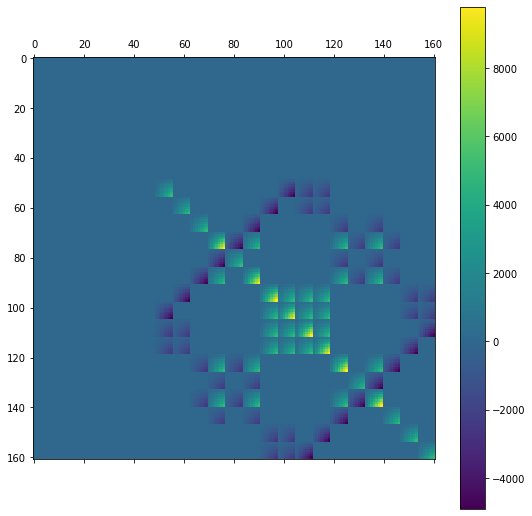

In [73]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [74]:
QUBO_matrix = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2

print(np.shape(QUBO_matrix ))

(161, 161)


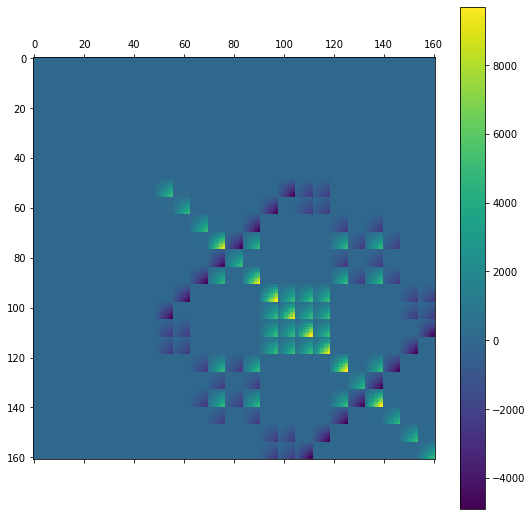

In [75]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [76]:
%run Function_set_dic.ipynb
m_t_u,m_t_l = capacity_subtree_limit_generator(pos,Q)

print(m_t_u)
m_t_l[:]=1
print(m_t_l)


QUBO_matrix_copy = QUBO_matrix

[6. 6. 1. 5. 7. 5. 6.]
[1. 1. 1. 1. 1. 1. 1.]


In [77]:

QUBO_matrix, QUBO_C3_p1, edge_dictionary_C31 = Constraint_3_part_1(Final_map, m_t_u, Q, edge_number, edge_dictionary, QUBO_matrix, penalty = penal)


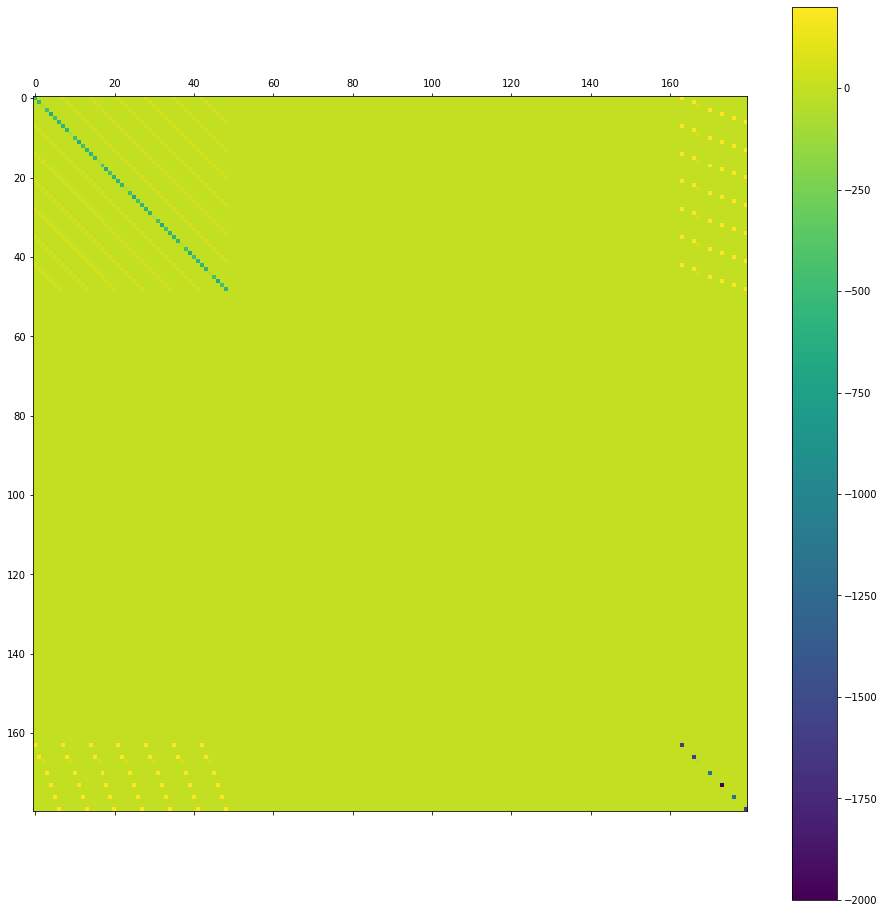

In [78]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_C3_p1 ,fignum=matfig.number)
plt.colorbar()
plt.show()

In [79]:
QUBO_matrix, QUBO_C3_p2, edge_dictionary_C32 = Constraint_3_part_2(Final_map, m_t_l, Q, edge_number, edge_dictionary_C31, QUBO_matrix, penalty = penal)

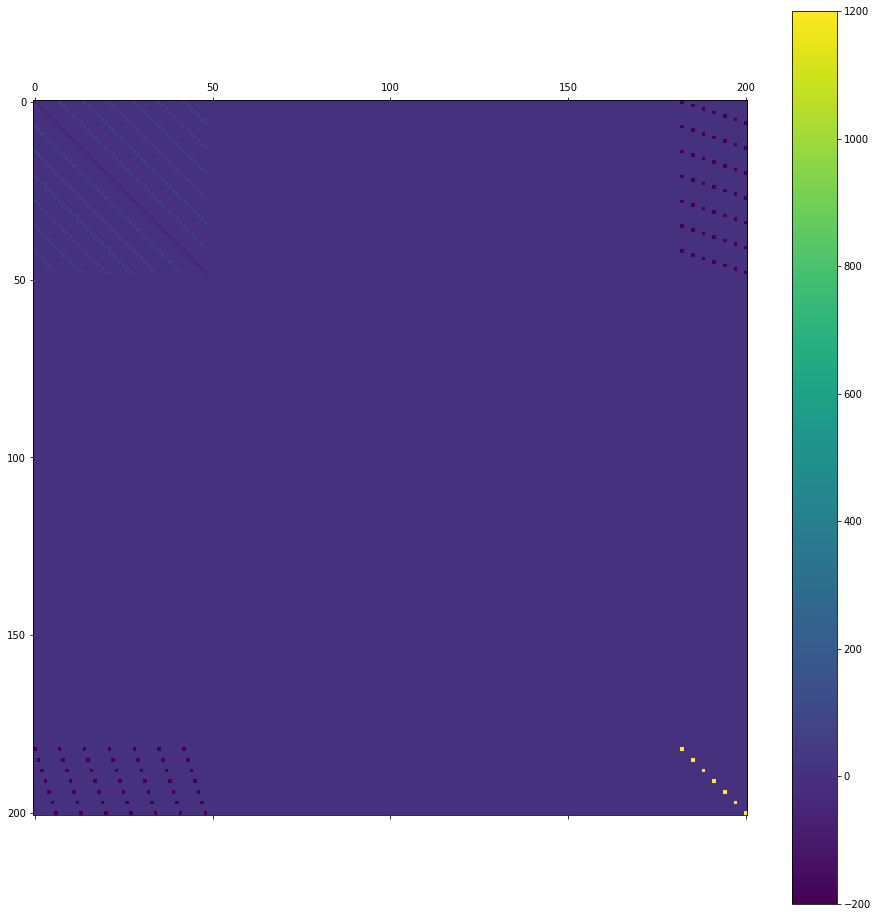

In [80]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_C3_p2,fignum=matfig.number)
plt.colorbar()
plt.show()

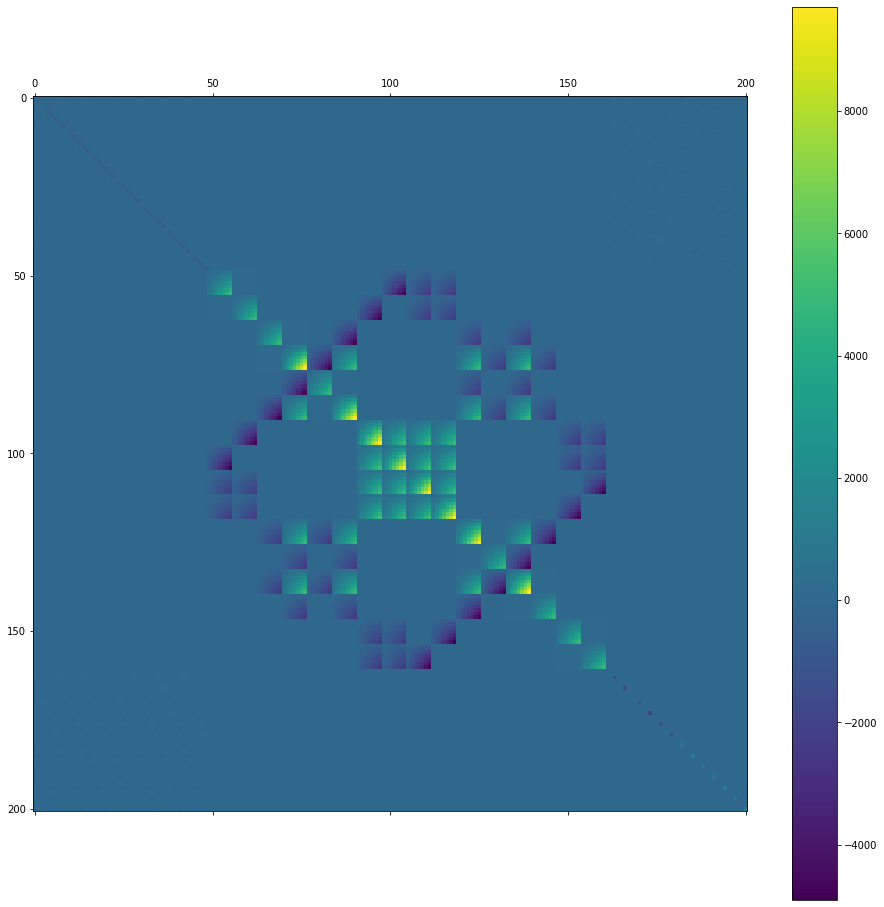

In [81]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [82]:
# Bus edge Ban map( Q ** 2)  可以通过就是 1 不可以就是 0
Ban_map_Bus = np.ones( Q**2 )



Final_QUBO_matrix, QUBO_Constraint_4 = Constraint_4(QUBO_matrix, Q, Ban_map_Bus ,penalty = 1e6)


print(np.shape(Final_QUBO_matrix))

(201, 201)


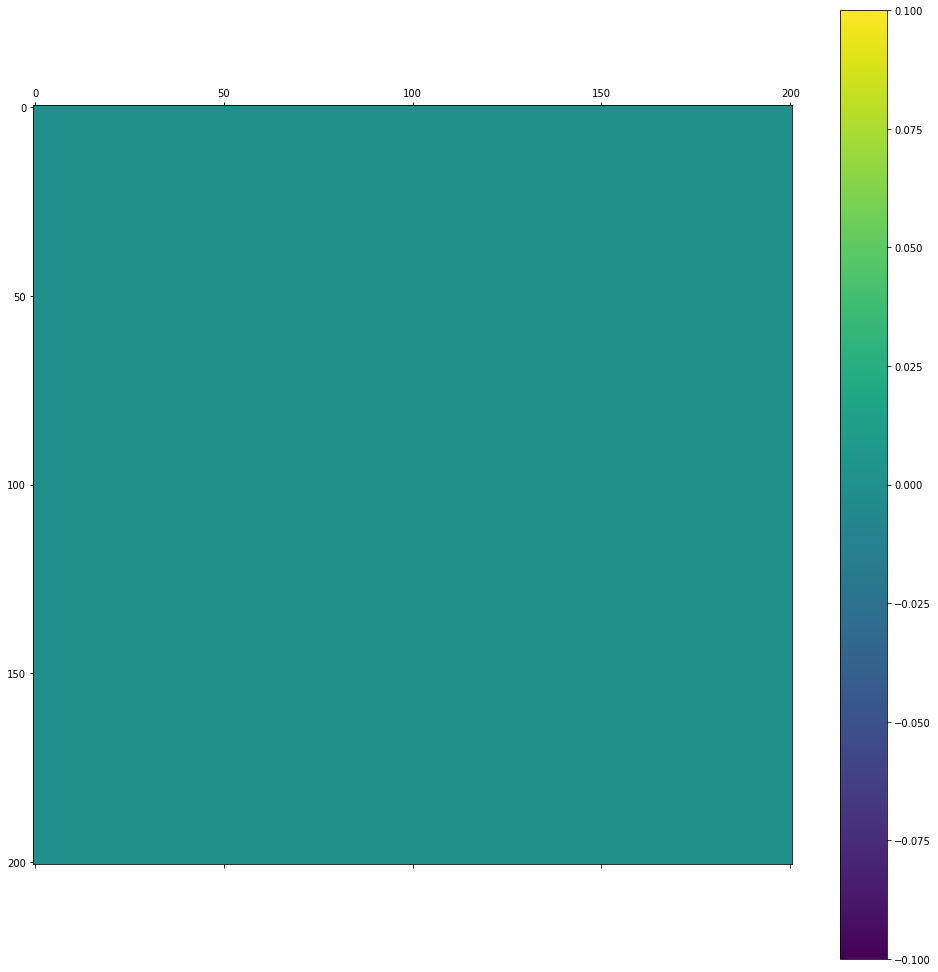

In [83]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(QUBO_Constraint_4,fignum=matfig.number)
plt.colorbar()
plt.show()

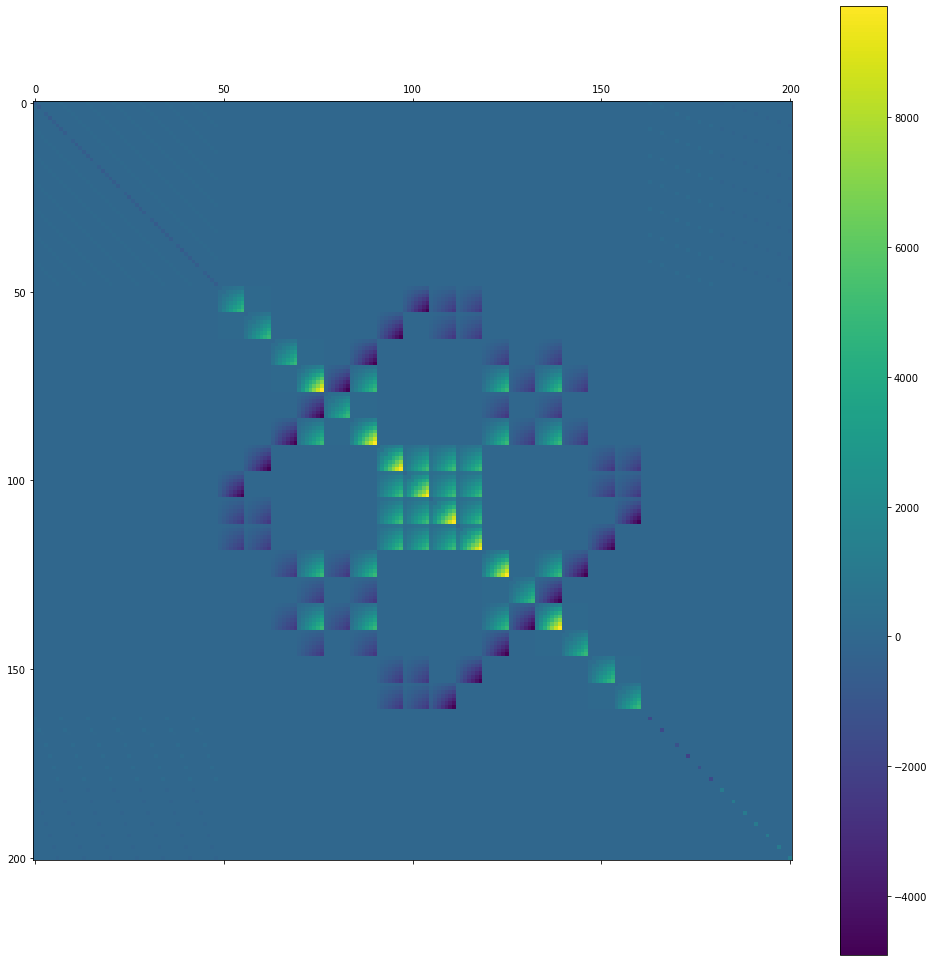

In [84]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(Final_QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [85]:
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt

In [86]:
QUBO = Final_QUBO_matrix

[  0   7  14  21  22  23  28  32  35  41  45  46  47  49  63  77  98 119
 140 154 162 164 165 166 168 169 170 171 172 173 174 175 176 177 178 179
 180 182 183 186 187 190 193 195 198 199]
[  0   7  14  21  22  23  28  32  35  41  45  46  47  49  63  77  98 119
 140 154]
0
1
2
3
3
3
4
4
5
5
6
6
6
7
9
11
14
17
20
22


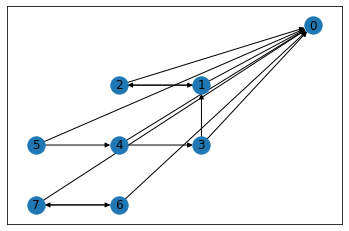

In [89]:
width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)


OP = sampleset.to_pandas_dataframe()
import pandas as pd

OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0

OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)

sampleset.info['qpu_access_time']
sampleset.info

location = np.where(OP_opt[:-2])[0]
print(location)
Q = len(pos)-1  
number_of_edge = len(compelete_label)

final_index = location[location <= Q*number_of_edge ]
print(final_index)


final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))
for value in final_index:
    print(str(value//Q))
    final_G .add_edges_from([edge for edge, label in compelete_label.items() if label == str(value//Q)])
    
nx.draw_networkx(final_G, pos)

In [88]:
OP

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,energy,num_occurrences
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,-11068.0,1


In [114]:
print(Q)
print(final_index//Q)
print(final_index%Q)

7
[ 0  5  5  6 10 11 16 18]
[0 1 2 0 4 4 0 4]


In [87]:

    
    
    #G.add_edges_from([(1, 2), (1, 3), (2, 3)])

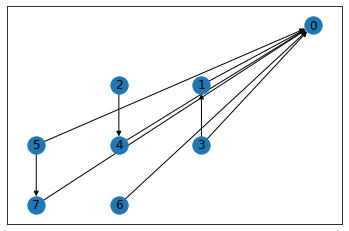

In [88]:
nx.draw_networkx(final_G, pos)


In [57]:
[edge for edge, label in compelete_label.items() if label == str(0)]

[(1, 0)]